<h1>기계학습 project</h1>

<b>제출자 : </b>2011140138 황태림

<h1>0. 시작 전...</h1>

<p>네트워크 칩입을 감지하는 Classfication Model을 설계하는 주제로 진행되는</p>
<p>이번 project의 목표는 약 12만개의 data set을 가진 파일로 machine learning </p>
<p>수업에서 배운 다양한 알고리즘을 활용, data를 가공 및 정제 후 학습시키는 것이다. </p>
<p>data 분석부터 algorithm 적용, 그리고 training을 마친 model을 사용하여</p>
<p>test data set을 통해 어느정도의 정밀도를 가지는지, 속도는 어느정도인지</p>
<p>결과를 도출하고 분석을 통해 최적화된 model을 설계하는 것이 최종 목적이다.</p>
<p>이를 위해 다음과 같은 순서로 project를 진행한다.</p>

<h4>1. data processing</h4>
<h4>2. classification models</h4>
<h4>3. conclusion</h4>





<h1>1. Data processing</h1>

<h5># pandas로 data set 불러오기</h5>

In [1]:
import pandas as pd
data = pd.read_csv('train_data.csv')
exam = pd.read_csv('test_data.csv')

In [2]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
6,0,icmp,50,4,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
7,0,icmp,50,4,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos
8,0,icmp,52,4,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
9,0,icmp,50,4,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos


<h5># data set의 label encoding 및 onehot encoding 진행 </h5>

In [3]:
# 공격 데이터(categorical data)를 정수 값으로 변환함

# Label Encoding

from sklearn.preprocessing import LabelEncoder

# train data
le = LabelEncoder()
integer_encoded = le.fit_transform(data.iloc[:,-1])
data2 = data.apply(le.fit_transform)

X = data2.iloc[:,:-1]
y = data2.iloc[:,-1]

# test data
le = LabelEncoder()
integer_encoded = le.fit_transform(exam.iloc[:,-1])
exam2 = exam.apply(le.fit_transform)

X_exam = exam2.iloc[:,1:-1]
y_exam = exam2.iloc[:,-1]


# # # manually droping
# X_original = X
# for i in range(6, 11):
#     X = X.drop(X_original.columns[i], axis = 1)
#     X_exam = X_exam.drop(X_original.columns[i], axis = 1)
# for i in range(12, 22):
#     X = X.drop(X_original.columns[i], axis = 1)
#     X_exam = X_exam.drop(X_original.columns[i], axis = 1)
# for i in range(23, 26):
#     X = X.drop(X_original.columns[i], axis = 1)
#     X_exam = X_exam.drop(X_original.columns[i], axis = 1)



# feature selection

# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel

# # X, y = data2.iloc[:, :-1], data2.iloc[:, -1]

# clf = ExtraTreesClassifier()
# clf = clf.fit(X, y)
# clf.feature_importances_

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

clf = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import SelectFromModel

# clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.feature_selection import SelectFromModel

# clf = AdaBoostClassifier(n_estimators=50)
# clf = clf.fit(X, y)
# clf.feature_importances_

# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import SelectFromModel

# clf = LogisticRegression().fit(X, y)



model = SelectFromModel(clf, prefit=True)
X_feat = model.transform(X)


# test data feature selection
selected_columns = model.get_support(indices=True)

X_final = X_exam
j = 0
for i in range(len(X_exam.columns)):
    if i != selected_columns[j]:
        X_final = X_final.drop(X_exam.columns[i], axis = 1)
    else:
        
        j+=1
        if j == len(selected_columns):
            j-=1

# 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_feat) # X의 평균과 표준편차
X_std = sc.transform(X_feat) # 트레이닝 데이터 표준화

sc.fit(X_final)
X_exam_std = sc.transform(X_final) # 테스트 데이터 표준화

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.25, random_state = 0)

C:\Development Tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<p>data processing은 먼저 label encoding을 통해 범주형 자료를 정수로 매핑하였다. </p>
<p>이후 feature selection을 진행하였다. 여기서 선택한 방법은 총 4개로</p>
<p>linearSVC, logistic regression의 선형적 model과</p>
<p>random forest, adaboost의 ensemble 및 tree model을 사용하였다.</p>
<p>특정 classification model을 통한 feature selection을 진행하였다.</p>
<p>각 model을 적용할 때마다 이후에 진행되는 model의 prediction accuracy는</p>
<p>큰 차이가 생길정도로 feature selection을 어떻게 하느냐에 따라</p>
<p>예측의 정확도에 큰 영향을 끼쳤다. </p>
<p>마지막으로 standardization을 통해 값들의 정규화를 진행하였다.</p>

In [4]:
selected_columns

array([ 0,  1,  2,  3,  4,  5,  7,  9, 10, 11, 12, 15, 16, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], dtype=int64)

In [5]:
# # OneHot Encoding

# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder()
# ohe.fit_transform(data2.iloc[:,-1].values.reshape(-1,1)).toarray()
# attacks = pd.get_dummies(data.iloc[:, -1])
# data_dropped = data.drop('xAttack', axis=1)
# data3 = pd.concat([data_dropped, attacks], axis=1)



In [6]:
# # Remove duplicated data

# duplicate = data3.duplicated()
# duplicate.drop_duplicates

<h1>2. Classification modeling</h1>

<p>classification model은 총 10가지를 구성하였다. 기본적으로 1가지만 사용하는</p>
<p>classification model 7개, ensemble을 사용한 model 3개로 구성되어 있다.</p>
<p>modeling하는데 걸리는 시간은 대체로 linear한 model가 빠르게 걸리는 편이고</p>
<p>recursive한 방법을 취하는 bagging이나 voting의 경우에는 걸리는 시간이 상대적으로</p>
<p>오래 걸렸다. 각 parameter를 바꿀 때마다 정확도가 바뀌는 부분을 확인하였다.</p>
<p>특히, model에서 parameter에 따라 overfitted되었다 볼 수 있는 부분을 줄여줌으로써</p>
<p>test data set에 대한 정확도를 높일 수 있었다.</p>
<p>또 하나의 특징으로 data set을 어떻게 preprocessing 하느냐에 따라서 정확도가 매우</p>
<p>큰 차이로 차이나는 model도 있음을 확인하였다. </p>










In [7]:
# timer

import time

In [8]:
# Perceptron

from sklearn.linear_model import Perceptron

# timer start
start = time.time()

ml = Perceptron(eta0 = 0.01, max_iter = 40, random_state = 0)
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = ml.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))

#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)


내부 테스트 set:31494, 오류 개수:1649
정확도: 0.95
최종 정확도: 0.72
걸린 시간: 3.07 초


In [ ]:
# Linear SVC

from sklearn.svm import LinearSVC

# timer start
start = time.time()

svc = LinearSVC(C=0.01, penalty="l1", dual=False)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = svc.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))
#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)




In [ ]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

# timer start
start = time.time()

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = lr.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))
#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)




<p>위의 세 model, perceptron과 linear SVC, logistic regression 같은 경우에는 data set의 feature selection을</p>
<p>tree model로 진행을 하게 되면 최종 정확도(학습시킨 model에 최종 test_data.csv의 data set을 넣음)는</p>
<p>약 40 ~ 50% 의 저조한 성적을 보여주었다. 그러나 linearSVC, logistic regression을 사용한 경우</p>
<p>최종 정확도는 76%선에서 결정되는 것을 볼 수 있었다. 이를 통해 현재 data set은 선형적 분류가</p>
<p>data set을 calssify하는데 있어 더 우수하다고 첫 추측을 할 수 있었다.</p>
<p>SVC는 logistic regression과 비교했을 때는 거의 유사한 시간과 정확도를 보여준다.</p>

In [ ]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

# timer start
start = time.time()

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = dt.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))
#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)



<p>decision tree의 경우 내부 테스트(train set 에서 70%는 train, 30%는 test)에서는</p>
<p>어떤 feature selection을 해도 높은 정확도(~0.99)를 보여주지만</p>
<p>최종 정확도를 따질 때에는 75% 선을 유지하였다. 대체로 자체적인 data set으로는</p>
<p>높은 결과를 보여주나 test set에서는 그보다 낮은 정확도를 보인다는 것으로</p>
<p>overfitting이 되는 것으로 추측할 수 있다.</p>
<p>빠른 처리 시간, 상대적으로 괜찮은 정확도를 보여준다.</p>


In [ ]:
# kNN

from sklearn.neighbors import KNeighborsClassifier

# timer start
start = time.time()

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = knn.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))

#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)



<p>knn은 시간적으로 오래 걸리면서 (전반적으로 30초 ~ 120초의 시간을 보임)</p>
<p>내부 테스트의 정확성은 95% 선을 유지하고 최종정확도도 linear model로</p>
<p>feature selection을 할 경우에는 75%선의 정확도를 보여준다</p>
<p>data set의 preprocessing을 달리해도 평균적인 정확도, 그러나 상대적으로</p>
<p>긴 시간이 걸린다는 점은 최고의 model로 선정하기엔 부족한 점이었다.</p>



In [12]:
# Random forests

from sklearn.ensemble import RandomForestClassifier

# timer start
start = time.time()

rf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = rf.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))


#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)


내부 테스트 set:31494, 오류 개수:43
정확도: 1.00
최종 정확도: 0.72
걸린 시간: 0.89 초


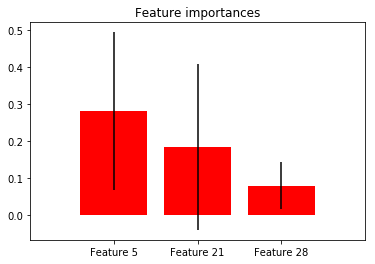

In [15]:
!pip install sklearn_evaluation
%matplotlib inline
from sklearn_evaluation import plot
plot.feature_importances(rf, top_n=3)

<p>프로젝트를 시작하기 전, 가장 우수할 것으로 생각했던 model이다.</p>
<p>linear model을 통한 feature selection은 random forest model에서</p>
<p>평균적인 내부 정확도(~ 92%)와 최종 정확도(~72%)를 보여주었다. 속도는 1초 미만으로</p>
<p>연산이 보통 끝났다. tree model을 통한 feature selection에서는</p>
<p>상대적으로 정확도가 향상하였다. 이를 통해 feature selection에서</p>
<p>linear model을 사용하면, linear model의 정확도가 높아지고</p>
<p>curve처럼 구획이 비선형인 model을 feature selection에 사용하면</p>
<p>관련 model의 정확도가 높아짐을 알 수 있었다.</p>
<p>matplotlib을 통해 feature importance를 확인하면</p>
<p>특정 feature가 비중이 높음을 알 수 있다</p>

In [19]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

# timer start
start = time.time()

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = ada.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))


#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)


내부 테스트 set:31494, 오류 개수:7364
정확도: 0.77
최종 정확도: 0.52
걸린 시간: 12.24 초


<p>선형, 비선형 model 관계없이 언제나 낮은 정확도를 보였다.</p>
<p>내부 정확도는 80% 선에서, 최종 정확도는 50% 이하로 나옴을 알 수 있었다.</p>
<p>adaboost로 feature selection을 진행할 경우 모든 model의 정확도가</p>
<p>50 ~ 60% 이하를 보일정도로 낮은 결과를 보여주었다.</p>
<p>이를 통해 data set에 따라 좋은 결과를 보이는 algorithm 및</p>
<p>classification model이 있음을 확인하였다.</p>

In [ ]:
# Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# timer start
start = time.time()

bag = BaggingClassifier(KNeighborsClassifier(), max_samples=0.7, max_features=0.7)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = bag.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))
#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)




내부 테스트 set:31494, 오류 개수:100
정확도: 1.00
최종 정확도: 0.74
걸린 시간: 1209.68 초


<p>bagging에서는 knn을 base로 진행하였다. feature가 많을 수록 처리속도가</p>
<p>체감할 수 있을 정도로 느려짐을 알 수 있었다. (1100초 이상 소요된 경우도 있음)</p>
<p>정확도는 knn보다 오히려 떨어지며, 속도도 느렸다. 기존에는 ensemble이</p>
<p>시간은 오래걸리더라도 정확성 면에서는 기존의 방법보다는 양호할 것이라</p>
<p>생각했지만 그렇지 않은 결과로 볼 때, 소수의 data를 가진 feature에서 기반한</p>
<p>overfitting이 아닐까 추측한다.</p>

In [ ]:
# Voting_1

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# timer start
start = time.time()

clf1 = RandomForestClassifier(random_state=1)
clf2 = DecisionTreeClassifier(max_depth=4)
clf3 = KNeighborsClassifier(n_neighbors=7)
clf4 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('rf', clf1), ('dt', clf2), ('knn', clf3), ('svc', clf4)], voting='hard')#, weights=[2,1,2])

clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
clf4 = clf4.fit(X_train,y_train)
eclf = eclf.fit(X_train,y_train)

y_pred = eclf.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = eclf.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))
#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)



In [ ]:
# Voting_2

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

# timer start
start = time.time()

clf1 = LogisticRegression()
clf2 = Perceptron(eta0 = 0.01, max_iter = 40, random_state = 0)
clf3 = LinearSVC(C=0.01, penalty="l1", dual=False)
eclf = VotingClassifier(estimators=[('reg', clf1), ('per', clf2), ('svc', clf3)], voting='hard')#, weights=[2,1,2])

clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)
eclf = eclf.fit(X_train,y_train)

y_pred = eclf.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = eclf.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))
#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)



<p>위의 두 model은 voting을 통해 기존의 model의 장점을 취합한 구조이다.</p>
<p>voting_1은 knn, tree, linearSVC, random forest 등 다양한 형태의</p>
<p>model 중에서 정확도가 어느정도 높은 4개를 취합하여 구성하였다.</p>
<p>voting_2는 가장 높은 정확도인 linear model을 사용한 feature selection을 한</p>
<p>data set과 linear model에서 높은 점수가 나온 3개의 model을 취합하였다.</p>
<p>첫 번째의 경우는 ensemble을 했더라도 정확도가 dramatic하게 높아지지는</p>
<p>않는 것을 확인하였다. 속도도 여러 model을 같이 사용하다 보니</p>
<p>수 분 단위로 걸리는 것을 알 수 있다. </p>
<p>voting_2의 경우에도 정확도는 위의 3개와 비슷하거나 오히려 낮았으며</p>
<p>속도 또한 최하위에 속하였다. 이를 통해 ensemble이 매력적인 기법이지만</p>
<p>언제나 최상의 결과를 취합한다해서 예측도 정확하진 않음을 알 수 있었다.</p>

<h1># 최종 결정된 model</h1>

In [ ]:
# 최종 결정된 model

# LogisticRegression

from sklearn.linear_model import LogisticRegression

# timer start
start = time.time()

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Result

from sklearn.metrics import accuracy_score

print('내부 테스트 set:%d, 오류 개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))

y_pred = lr.predict(X_exam_std)

print('최종 정확도: %.2f' %accuracy_score(y_exam, y_pred))
#timer end
end = (time.time() - start)
print('걸린 시간: %.2f 초' %end)




<p>수행을 여러 번 했을 때 평균적으로 가장 정확하고 상대적으로 속도도</p>
<p>사용할 만 했던 logisticc regression을 최종 model로 선정했다.</p>
<p>data preprocessing의 경우에는 linear SVC를 사용했을 때</p>
<p>전반적인 model의 정확도가 대체로 70% 이상이었음을 감안하여</p>
<p>4 개의 feature selection model 중 선택 하였다. </p>

<h1>3. Conclusion</h1>

<p>크게 n가지의 결론을 내릴 수 있었다. </p>
<p>1. data preprocessing이 매우 중요하다. </p>
<p>preprocessing에서 특히, feature selection에 따라 정확도가 크게 바뀜을</p>
<p>알 수 있었다. 위에서는 코드화 되어있지 않지만, 처음에는 feature selection도</p>
<p>안하고, 표준화 과정도 거치지 않았다. 이러한 상태로 측정한 정확도는</p>
<p>처리한 후의 결과보다 낮은 정확도를 보여주었다. feature selection의 경우에는 특히</p>
<p>manually 하게 불필요해 보이는 feature를 제거했다. rule을 인위적으로 만든 것인데</p>
<p>오히려 사용하지 않았을 때보다 2 ~ 3% 정확도가 낮아짐을 알 수 있었다. </p>
<p>2. model에 관한 선입견은 안된다. </p>
<p>기존 기계학습 수업을 들으면서 random forest나 ensemble, support vector를 사용하는</p>
<p>model이 다른 linear한 model이나 decision tree보다 항상 더 나을 것이라는</p>
<p>선입견을 가지고 있었다. 그러나 막상 data를 처리하고 test set으로 prediction할 때</p>
<p>linear한 model들이 더 우수한 결과를 보였다. 이를 통해 기계학습을 수행할</p>
<p>data set에 맞는 알맞은 model이 있음을 확인하였다. 시간적인 부분에서도</p>
<p>같은 정확도라 할지라도 시간은 10~100배 이상의 큰 차이를 보일 수 있으며</p>
<p>처리시간 또한 중요한 부분임을 알게되었다.</p>
<p>3. 자체적인 정확도와 실제 예측은 차이가 있다.</p>
<p>train set에서 10~50%의 data를 추출하여 test set으로 사용하였고, 이를 통해</p>
<p>최종 정확도를 산출하였는데, 언제나 자체적인 test set으로 할 때에는</p>
<p>못해도 80% 의 정확도를, 대체로는 95% 이상의 정확도를 보여주었다.</p>
<p>그러나 최종 정확도는 최대 76%가 본인의 한계치였다. 물론, 본인이 더</p>
<p>많은 parameter 수정, 다양한 model 사용, feature selection의 다른 접근을</p>
<p>하였다면 80%를 넘는 학우들처럼 정확도가 높아졌을 것이다. 그러나 이러한 부분을</p>
<p>차치하고서도 train set으로 model을 만들고 추출한 test set으로 나온 정확도가</p>
<p>아무리 높을지라도 실제 정확도는 오히려 50% 이하일 때도 있었다. 내부의 정확도가</p>
<p>다소 낮더라도 최종 정확도는 높은 경우도 확인할 수 있었다. 결국 overfit된 문제해결이나</p>
<p>옳은 feature selection을 하기 위해 외부의 test set으로 꼭 확인해야 함을알 수 있었다. </p>
<p>4. visualization이 필요하다.</p>
<p>제출하는 파일에는 없지만, matplotlib을 이용하여 data set의 분포를 feature마다</p>
<p>확인하는 작업을 수행하였다. 이를통해 class 와 feature 간의 관계를 좀 더 알기가 쉬웠다. </p>
<p>조금 더 시간이 있었더라면 다양한 시각화를 통해 분석하고 방향을 잡았을텐데</p>
<p>그러지 못했다는 점이 매우 아쉬운 점이다.</p>
<p>이번 프로젝트를 수행하면서 기존에 배웠던 것들을 활용할 수 있었다.</p>
<p>또 생각보다 기계학습은 model을 찾거나, 코드를 짜거나 하는 부분은</p>
<p>크게 어렵지 않음을 알게되었다. 제일 중요한 것이 data를 어떻게</p>
<p>가공하느냐였고, 이 부분에 가장 많은 시간이 소요되었다.</p>
<p>data를 다루고 볼 줄 아는 통찰력이 중요한 분야임을 배웠다.</p>
<p>강의와 과제, 시험은 여기서 끝나지만 앞으로도 계속 독학하면서</p>
<p>학습하고 싶은 분야임을 알게되어 기쁘다.</p>





























